✔✨ Importing the Dependencies


In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib


✔✨ Loadig Data

In [30]:
data = pd.read_csv("diabetes.csv")


✔✨Data Analysis

In [31]:
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
data.shape


(768, 9)

<Axes: >

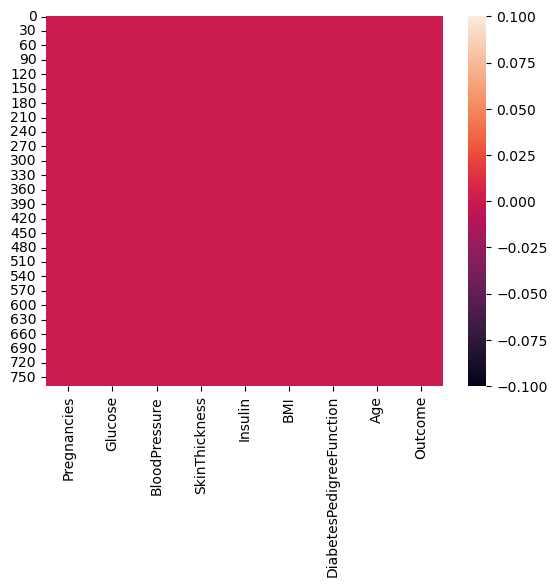

In [33]:
sns.heatmap(data.isnull())     # check null values


#🕵️‍♀️  Note : heatmap is blank >> there is no missing values 


<Axes: >

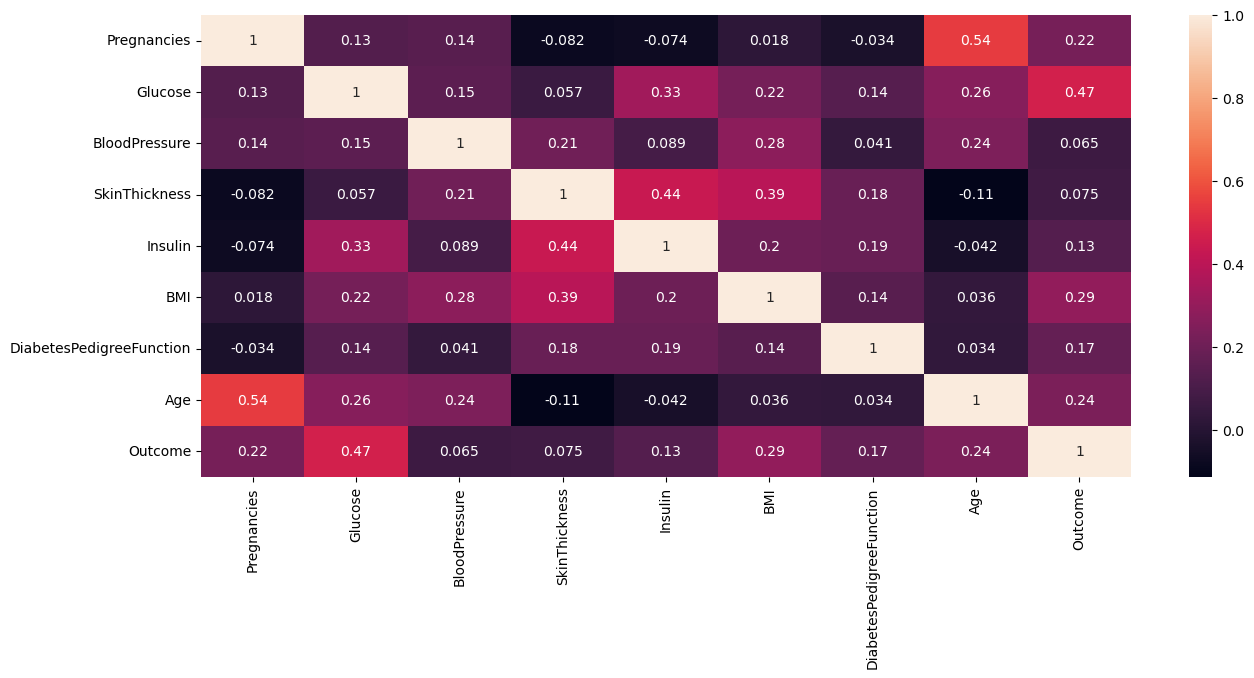

In [35]:
# show correlation
plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),annot=True)


In [36]:
data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
data['Outcome'].value_counts()


0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [38]:
data.groupby('Outcome').mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Based on the analysis, it has been observed that individuals with elevated glucose and insulin levels, particularly those aged 37 or older, are at a higher risk of developing diabetes

#✔✨ separating the data and labels


In [39]:

X = data.drop(columns = 'Outcome' , axis =1)   # drop column
Y = data ['Outcome']


✔✨Scale Data 

In [42]:
scaler = StandardScaler()


In [43]:
scaler.fit(X)


StandardScaler()

In [44]:
standardized_data = scaler.transform(X)


In [45]:
print(standardized_data)


[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [46]:
X = standardized_data
Y = data['Outcome']


✔✨Train Test Split 

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)


In [48]:
print(X.shape, X_train.shape, X_test.shape)


(768, 8) (614, 8) (154, 8)


✔✨Build Model 

In [49]:
classifier = svm.SVC(kernel='linear')


✔✨ Train Model


In [50]:
classifier.fit(X_train, Y_train)


SVC(kernel='linear')

✔✨ Model Evaluate

In [51]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy)


Accuracy score of the training data :  0.7866449511400652


In [52]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy)


Accuracy score of the test data :  0.7727272727272727


✔✨ Save The Model 


In [53]:
joblib.dump(classifier, 'svm_model.pkl')


['svm_model.pkl']